# 11_08 클래스 불균형 문제 해결을 위한 언더샘플링과 오버샘플링

#### 데이터 불균형 문제
* 분류 모델에서 데이터의 불균형이 심하면 예측의 정확도가 떨어진다.
* 기계학습 분류 모델은 비중의 중요도에 차별을 두지 않고 전체적으로 분류를 잘 하도록 학습된다.

#### 불균형 문제 해결 방법
* 가중치 밸런싱(Weight balancing): 중요도가 높은 클래스에 정확도 가중치를 주는 방법.
* 오버 샘플링(Over sampling): 작은 비중의 클래스 데이터를 늘리는 방법.
* 언더 샘플링(Under sampling): 큰 비중의 클래스 데이터를 줄이는 방법.

In [25]:
# 필요한 패키지 설치 및 임포트
!pip install imbalanced-learn==0.10.1
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import *
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.7.0
    Uninstalling imbalanced-learn-0.7.0:
      Successfully uninstalled imbalanced-learn-0.7.0


In [26]:
# 데이터 불러오기
df = pd.read_csv('/Users/adam/Data_Analytics/Python/Datasets/social_network_ads/Social_Network_Ads.csv')

# 데이터 샘플 확인
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [27]:
# 각 컬럼의 속성 및 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


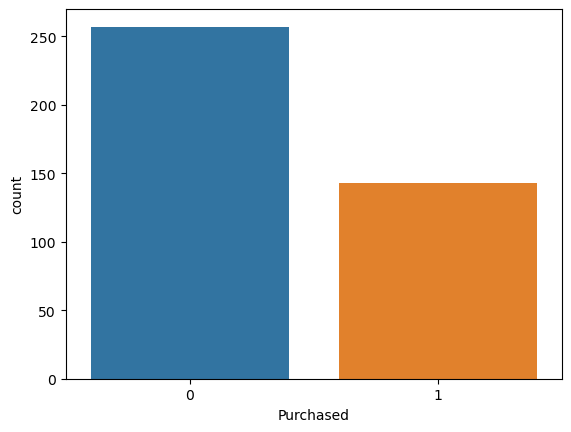

In [28]:
# Purchased 컬럼 클래스 분포 시각화
sns.countplot(x='Purchased', data=df)

plt.show()

In [29]:
# Gender 컬럼 가변수 처리
df_d = pd.get_dummies(df['Gender'])

df2 = pd.merge(df.drop(['Gender'], axis=1),
               df_d['Male'], left_index=True, right_index=True, how = 'inner')

df2.head()

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [30]:
# 데이터를 학습 세트, 테스트 세트로 분리

X = df2.drop(['Purchased'], axis=1)
y = df2[['Purchased']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

X_train.head()

,User ID,Age,EstimatedSalary,Male
57,15807481,28,79000,1
87,15631912,28,85000,0
357,15671387,41,72000,0
355,15606472,60,34000,1
238,15617877,46,82000,0


In [31]:
# 언더샘플링 적용

X_train_under, y_train_under = RandomUnderSampler(random_state=0).fit_resample(X_train, y_train)

print('RandomUnderSampler 적용 전 학습 세트 변수/레이블 데이터 세트:'
      , X_train.shape, y_train.shape)
print('RandomUnderSampler 적용 후 학습 세트 변수/레이블 데이터 세트:'
      ,X_train_under.shape, y_train_under.shape)
print('\n')
print('RandomUnderSampler 적용 전 레이블 값 분포:\n'
      , pd.Series(y_train['Purchased']).value_counts())
print('\n')
print('RandomUnderSampler 적용 후 레이블 값 분포:\n'
      , pd.Series(y_train_under['Purchased']).value_counts())

RandomUnderSampler 적용 전 학습 세트 변수/레이블 데이터 세트: (300, 4) (300, 1)
RandomUnderSampler 적용 후 학습 세트 변수/레이블 데이터 세트: (224, 4) (224, 1)


RandomUnderSampler 적용 전 레이블 값 분포:
 0    188
1    112
Name: Purchased, dtype: int64


RandomUnderSampler 적용 후 레이블 값 분포:
 0    112
1    112
Name: Purchased, dtype: int64


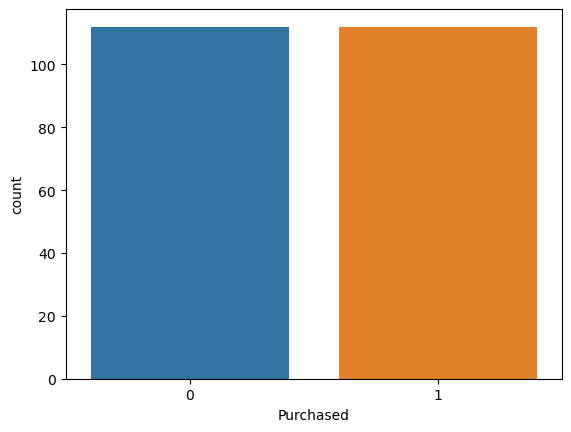

In [32]:
# 언더샘플링 적용 후 Purchased 컬럼 클래스 분포 시각화
sns.countplot(x='Purchased', data=y_train_under)

plt.show()

In [33]:
# 오버샘플링 적용

smote = SMOTE(k_neighbors=2, random_state=0)
oversample = SMOTE()

X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 변수/레이블 데이터 세트:'
      , X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 변수/레이블 데이터 세트:'
      , X_train_over.shape, y_train_over.shape)
print('\n')
print('SMOTE 적용 전 레이블 값 분포:\n'
      , pd.Series(y_train['Purchased']).value_counts())
print('\n')
print('SMOTE 적용 후 레이블 값 분포:\n'
      , pd.Series(y_train_over['Purchased']).value_counts())



SMOTE 적용 전 학습용 변수/레이블 데이터 세트: (300, 4) (300, 1)
SMOTE 적용 후 학습용 변수/레이블 데이터 세트: (376, 4) (376, 1)


SMOTE 적용 전 레이블 값 분포:
 0    188
1    112
Name: Purchased, dtype: int64


SMOTE 적용 후 레이블 값 분포:
 0    188
1    188
Name: Purchased, dtype: int64


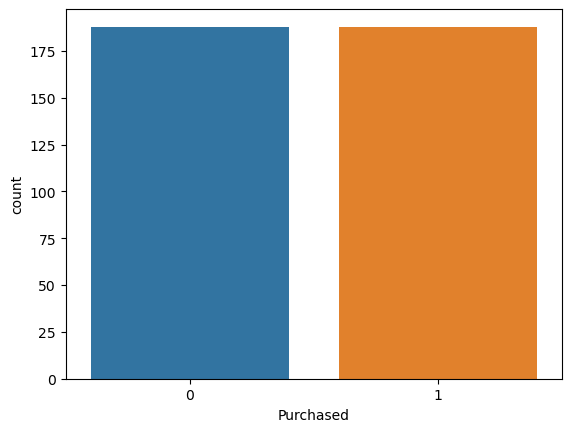

In [34]:
# 오버샘플링 적용 후 Purchaased 컬럼 클래스 분포 시각화
sns.countplot(x='Purchased', data=y_train_over)

plt.show()